# Importing necessary libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#LOADING THE DATA
data=pd.read_csv("Mall_Customers.csv")

In [3]:
#First 10 rows of our "data"
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()#to get column info like dtype, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


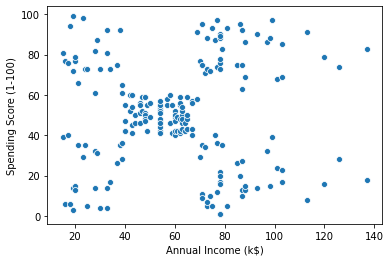

In [5]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'])

In [6]:
x=data.iloc[:,3:5]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
from sklearn.cluster import KMeans,AgglomerativeClustering

# K-Means Clustering

# Elbow method

In [8]:
wcss=[]
clusters=list(range(1,11))
for c in clusters:
    km=KMeans(n_clusters=c)
    km.fit(x)
    wcss.append(km.inertia_)

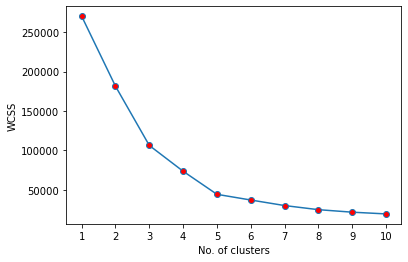

In [9]:
plt.plot(clusters,wcss,marker="o",mfc="red")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.xticks(clusters)
plt.show()

### Clearly, optimum no. of clusters =5 

## Buliding the KMeans Clustering Model with optimum clusters

In [10]:
model=KMeans(n_clusters=5)
model.fit(x)
y_pred=model.predict(x)

In [11]:
y_pred.shape

(200,)

## Visualizing KMeans Clustering 

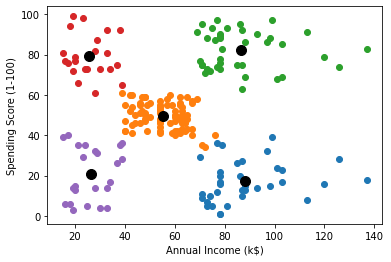

In [12]:
plt.scatter(x[y_pred==0]['Annual Income (k$)'],x[y_pred==0]['Spending Score (1-100)'])
plt.scatter(x[y_pred==1]['Annual Income (k$)'],x[y_pred==1]['Spending Score (1-100)'])
plt.scatter(x[y_pred==2]['Annual Income (k$)'],x[y_pred==2]['Spending Score (1-100)'])
plt.scatter(x[y_pred==3]['Annual Income (k$)'],x[y_pred==3]['Spending Score (1-100)'])
plt.scatter(x[y_pred==4]['Annual Income (k$)'],x[y_pred==4]['Spending Score (1-100)'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [13]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [14]:
model.cluster_centers_[:,0]#all x values

array([88.2       , 55.2962963 , 86.53846154, 25.72727273, 26.30434783])

# Hierarchical Clustering

# Dendogram

In [15]:
from scipy.cluster import hierarchy as sch

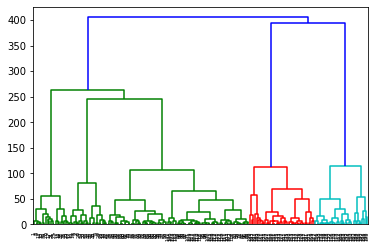

In [16]:
sch.dendrogram(sch.linkage(x,method="ward"))
plt.show()

### This gives 5 clusters

### Buliding the Hierarchical Clustering Model with optimum clusters

In [17]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [18]:
y_pred_hc=hc.fit_predict(x)

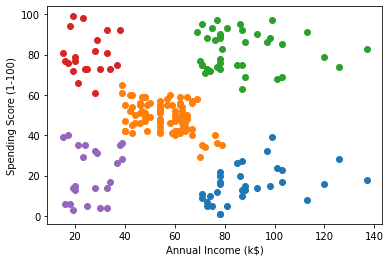

In [19]:
plt.scatter(x[y_pred_hc==0]['Annual Income (k$)'],x[y_pred_hc==0]['Spending Score (1-100)'])
plt.scatter(x[y_pred_hc==1]['Annual Income (k$)'],x[y_pred_hc==1]['Spending Score (1-100)'])
plt.scatter(x[y_pred_hc==2]['Annual Income (k$)'],x[y_pred_hc==2]['Spending Score (1-100)'])
plt.scatter(x[y_pred_hc==3]['Annual Income (k$)'],x[y_pred_hc==3]['Spending Score (1-100)'])
plt.scatter(x[y_pred_hc==4]['Annual Income (k$)'],x[y_pred_hc==4]['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()